## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline

## Opening file

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data set exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Handling duplicate patients

In [4]:
def sort_df(df, column_idx, key):
    '''Takes a dataframe, a column index and a custom function for sorting, 
    returns a dataframe sorted by that column using that function'''

    col = df.loc[:,column_idx]
    df = df.loc[[i[1] for i in sorted(zip(col,range(len(col))), key=key)]]
    return df

In [5]:
cmp = lambda x:2 if '>30' in x else 1 if '<30' in x else 0

In [6]:
df = sort_df(df,'readmitted',cmp).drop_duplicates('patient_nbr')

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.151800e+04,7.151800e+04,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,1.655719e+08,5.505160e+07,2.068528,3.623130,5.698356,4.310244,43.280153,1.405031,15.828966,0.312467,0.129156,0.403507,7.314858
std,1.047863e+08,3.947573e+07,1.486299,5.169046,4.137826,2.974873,19.886911,1.741099,8.296149,1.125190,0.645424,0.906662,1.978003
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.437196e+07,2.337577e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.497689e+08,4.816680e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,2.331715e+08,8.752222e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,126.000000,6.000000,81.000000,40.000000,64.000000,16.000000,16.000000


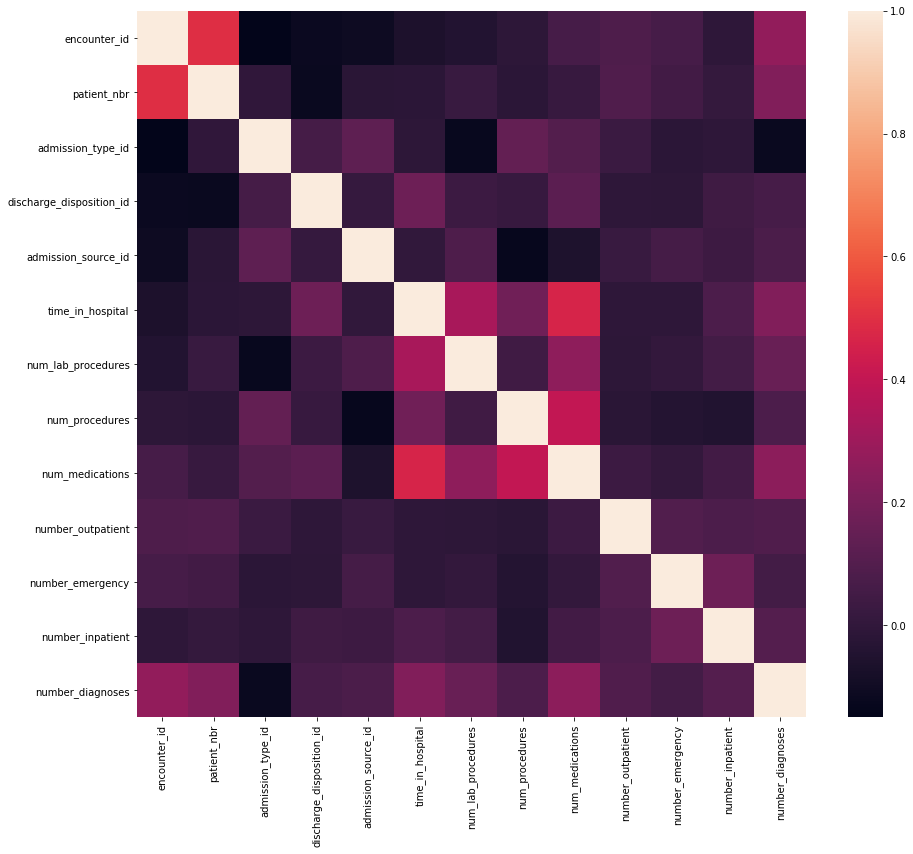

In [8]:
# Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

Counter({'NO': 54820, '>30': 12424, '<30': 4274})


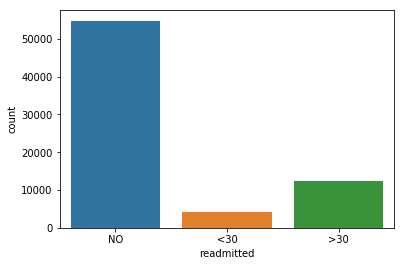

In [9]:
# Visualizing classes
print(collections.Counter(df['readmitted']))
sns.countplot(df['readmitted'])

# Part A

### Missing values exploration

In [10]:
df2 = df.iloc[:, :-1]
print("# of Rows, # of Columns: ",df2.shape)
print("\nColumn Name           # of Missing Values\n")
print((df2[:] == '?').sum())

# of Rows, # of Columns:  (71518, 49)

Column Name           # of Missing Values

encounter_id                    0
patient_nbr                     0
race                         1886
gender                          0
age                             0
weight                      68666
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  30270
medical_specialty           34572
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         14
diag_2                        293
diag_3                       1148
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0


In [11]:
print("# of Rows, # of Columns: ",df2.shape)
print("\nColumn Name              % Missing Values\n")
print(((df2[:] == '?').sum())/101766*100)

# of Rows, # of Columns:  (71518, 49)

Column Name              % Missing Values

encounter_id                 0.000000
patient_nbr                  0.000000
race                         1.853271
gender                       0.000000
age                          0.000000
weight                      67.474402
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  29.744708
medical_specialty           33.972054
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.013757
diag_2                       0.287915
diag_3                       1.128078
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metfor

**7 columns have missing values and it can be seen that 96% of the patients did not have their weight measured which causes concern as the weight can be an important indicator of someone's health condition.** Because there is over 96% of missing values, removal has been the option to consider here, though as it will lead to loss of a ton of data.

These can be considered as Missing Completely At Random (MCAR) values.

As seen above, there is no missing value from the Glucose serum test result (max_glu_serum) to the last feature, and they are all categorical. Therefore, those feature will be encoded with the label encoder later on.

### Handling missing values & feature transformations 

In [12]:
# Our label encoder
encoder = LabelEncoder()

#### Race

In [13]:
ap=df.groupby(by=['race'])
ap.size()

race
?                   1886
AfricanAmerican    12913
Asian                509
Caucasian          53527
Hispanic            1512
Other               1171
dtype: int64

**Race is a categorical feature of 5 different values.** One waay to tackle the missing values here can be to replace the missing values with the most common ones which is 'caucasian'.

In [14]:
# replace '?' with nan
# df[['race']] = df[['race']].replace('?', np.nan)

# df = df.fillna(df['race'].mode().iloc[0])

most_imputer = SimpleImputer(missing_values='?', strategy="most_frequent")
mean_imputer = SimpleImputer(missing_values='?', strategy="mean")

df[['race']] = most_imputer.fit_transform(df[['race']])

In [15]:
ap=df.groupby(by=['race'])
ap.size()

race
AfricanAmerican    12913
Asian                509
Caucasian          55413
Hispanic            1512
Other               1171
dtype: int64

The feature is then converted to numeric with our label encoder

In [16]:
df['race'] = encoder.fit_transform(df['race'])

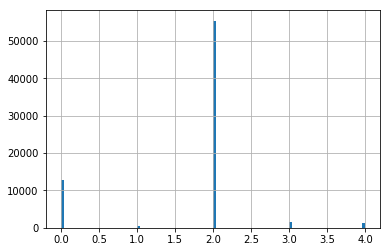

In [17]:
df['race'].hist(grid=True,bins=100)

#### Weight

In [18]:
ap=df.groupby(by=['weight'])
ap.size()

weight
>200             3
?            68666
[0-25)          43
[100-125)      559
[125-150)      131
[150-175)       34
[175-200)        8
[25-50)         89
[50-75)        785
[75-100)      1200
dtype: int64

**Because imputting the value of the weight from such a small amount of given weight can lead to overfitting, this feature is dropped.**

In [19]:
df.drop('weight', axis=1, inplace=True)

#### Payer code

In [20]:
ap=df.groupby(by=['payer_code'])
ap.size()

payer_code
?     30270
BC     3431
CH      114
CM     1392
CP     1941
DM      381
FR        1
HM     4096
MC    21138
MD     2235
MP       37
OG      656
OT       64
PO      461
SI       36
SP     3253
UN     1891
WC      121
dtype: int64

Similar to the weight, the payer code has too may missing values to consider imputing, it is also an irrelevant feature to the outcome, just like the ID and admission number, therefore, the feature is dropped. 

In [21]:
df.drop('payer_code', axis=1, inplace=True)

#### Medical Specialty

In [22]:
ap=df.groupby(by=['medical_specialty'])
ap.size()

medical_specialty
?                           34572
AllergyandImmunology            6
Anesthesiology                 10
Anesthesiology-Pediatric       17
Cardiology                   4168
                            ...  
Surgery-Plastic                34
Surgery-Thoracic               93
Surgery-Vascular              355
SurgicalSpecialty              23
Urology                       504
Length: 68, dtype: int64

In [23]:
np.unique(df['medical_specialty'])

array(['?', 'AllergyandImmunology', 'Anesthesiology',
       'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
       'DCPTEAM', 'Dentistry', 'Emergency/Trauma', 'Endocrinology',
       'Endocrinology-Metabolism', 'Family/GeneralPractice',
       'Gastroenterology', 'Gynecology', 'Hematology',
       'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases',
       'InternalMedicine', 'Nephrology', 'Neurology', 'Neurophysiology',
       'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics',
       'ObstetricsandGynecology', 'Oncology', 'Ophthalmology',
       'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath',
       'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics',
       'Pediatrics-CriticalCare', 'Pediatrics-EmergencyMedicine',
       'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology',
       'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'Perinatology',
       'PhysicalMedicineandRehabilitation', 'PhysicianNotFound',
       'Podiatr

The specialty of the admitting department also contains a lot of missing values (49% of the data set), this is an important feature as it determines from which department the patient was first admitted, to avoid losing this information, the missing department name could probably be an unknown one, or a 'general' department. Therefore, the '?' will be replaced by an 'other' department. similar to the race feature and then encoded to numerical with our label encoder.

In [24]:
df[['medical_specialty']] = df[['medical_specialty']].replace('?', 'Other')

In [25]:
for i in np.unique(df['medical_specialty']):
    if "Anesth" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Anesthesiology')
    elif "Surg" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Surgery')
    elif "Cardio" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Cardiology')
    elif "Endocrin" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Endocrinology')
    elif "Hemato" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Hematology')
    elif "Obste" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Obstetrics')
    elif "Pediat" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Pediatrics')
    elif "Psychi" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Psychiatry')
    elif "Orthoped" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Orthopedics')
    elif "Radio" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Radiology')
    elif "Neuro" in i:
        df[['medical_specialty']] = df[['medical_specialty']].replace(i, 'Neurology')

In [26]:
np.unique(df['medical_specialty'])

array(['AllergyandImmunology', 'Anesthesiology', 'Cardiology', 'DCPTEAM',
       'Dentistry', 'Emergency/Trauma', 'Endocrinology',
       'Family/GeneralPractice', 'Gastroenterology', 'Gynecology',
       'Hematology', 'Hospitalist', 'InfectiousDiseases',
       'InternalMedicine', 'Nephrology', 'Neurology', 'Obstetrics',
       'Oncology', 'Ophthalmology', 'Orthopedics', 'Osteopath', 'Other',
       'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics',
       'Perinatology', 'PhysicalMedicineandRehabilitation',
       'PhysicianNotFound', 'Podiatry', 'Proctology', 'Psychiatry',
       'Psychology', 'Pulmonology', 'Radiology', 'Resident',
       'Rheumatology', 'Speech', 'Surgery', 'Urology'], dtype=object)

After these modifications, the number of different departments has been reduced from 73 to 42.

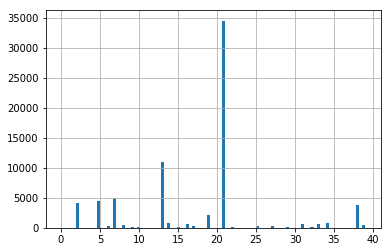

In [27]:
df['medical_specialty'] = encoder.fit_transform(df['medical_specialty'])

df['medical_specialty'].hist(grid=True,bins=100)

##### Outliers

In [28]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['medical_specialty'].quantile(q = 0.25)
q2 = df['medical_specialty'].quantile(q = 0.50)
q3 = df['medical_specialty'].quantile(q = 0.75)
q4 = df['medical_specialty'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")

# Number of outliers

o_l = df[df['medical_specialty'] > h_outliers]['medical_specialty'].count()
print("\n# of outliers:", o_l)

Q1: 13.0 ; Q2: 21.0 ; Q3: 21.0 ; Q4: 39.0

The outliers are outside the range [ 1.0 , 33.0 ].

# of outliers: 5192


In [29]:
# df.drop(df[df['medical_specialty'] > h_outliers].index, inplace=True, axis=0)

#### Diagnosis 1

In [30]:
ap=df.groupby(by=['diag_1'])
ap.size()

diag_1
10      1
11      8
110     2
112    43
114     1
       ..
V63     7
V66     2
V67     1
V70     1
V71     7
Length: 691, dtype: int64

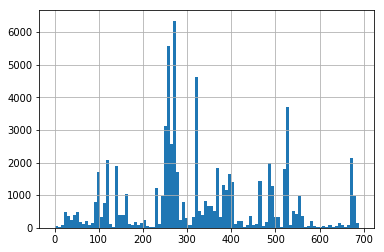

In [31]:
df[['diag_1']] = most_imputer.fit_transform(df[['diag_1']])
df['diag_1'] = encoder.fit_transform(df['diag_1'])

df['diag_1'].hist(grid=True,bins=100)

##### Outliers

In [32]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['diag_1'].quantile(q = 0.25)
q2 = df['diag_1'].quantile(q = 0.50)
q3 = df['diag_1'].quantile(q = 0.75)
q4 = df['diag_1'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")

# Number of outliers

o_l = df[df['diag_1'] > h_outliers]['diag_1'].count()
print("\n# of outliers:", o_l)

Q1: 252.0 ; Q2: 294.0 ; Q3: 449.0 ; Q4: 689.0

The outliers are outside the range [ -43.5 , 744.5 ].

# of outliers: 0


In [33]:
# df.drop(df[df['diag_1'] > h_outliers].index, inplace=True, axis=0)

#### Diagnosis 2

In [34]:
ap=df.groupby(by=['diag_2'])
ap.size()

diag_2
11       2
110      3
111      1
112    138
117      8
      ... 
V69      1
V70      7
V72     12
V85    141
V86      1
Length: 721, dtype: int64

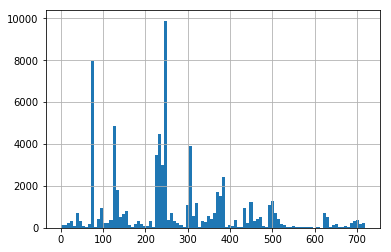

In [35]:
df[['diag_2']] = most_imputer.fit_transform(df[['diag_2']])
df['diag_2'] = encoder.fit_transform(df['diag_2'])

df['diag_2'].hist(grid=True,bins=100)

##### Outliers

In [36]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['diag_2'].quantile(q = 0.25)
q2 = df['diag_2'].quantile(q = 0.50)
q3 = df['diag_2'].quantile(q = 0.75)
q4 = df['diag_2'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")


# Number of outliers

o_l = df[df['diag_2'] > h_outliers]['diag_2'].count()
print("\n# of outliers:", o_l)

Q1: 134.0 ; Q2: 250.0 ; Q3: 361.0 ; Q4: 719.0

The outliers are outside the range [ -206.5 , 701.5 ].

# of outliers: 459


In [37]:
# df.drop(df[df['diag_2'] > h_outliers].index, inplace=True, axis=0)

#### Diagnosis 3

In [38]:
ap=df.groupby(by=['diag_3'])
ap.size()

diag_3
11       1
110     15
112    144
115      1
117      4
      ... 
V66     16
V70      2
V72      6
V85     75
V86      3
Length: 750, dtype: int64

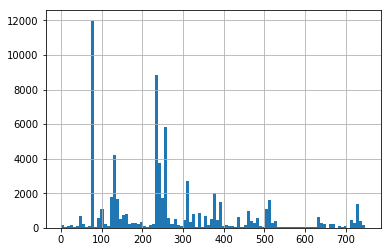

In [39]:
df[['diag_3']] = most_imputer.fit_transform(df[['diag_3']])
df['diag_3'] = encoder.fit_transform(df['diag_3'])

df['diag_3'].hist(grid=True,bins=100)

##### Outliers

In [40]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['diag_3'].quantile(q = 0.25)
q2 = df['diag_3'].quantile(q = 0.50)
q3 = df['diag_3'].quantile(q = 0.75)
q4 = df['diag_3'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")

# Number of outliers

o_l = df[df['diag_3'] > h_outliers]['diag_3'].count()
print("\n# of outliers:", o_l)

Q1: 131.0 ; Q2: 239.0 ; Q3: 337.0 ; Q4: 748.0

The outliers are outside the range [ -178.0 , 646.0 ].

# of outliers: 3547


In [41]:
# df.drop(df[df['diag_3'] > h_outliers].index, inplace=True, axis=0)

#### Missing values conclusion

Now that the missing values have been dealt with and the outliers have been removed, the categorical ones will be dealt with in the rest of the notebook.

In [42]:
df2 = df.iloc[:, :-1]
print("# of Rows, # of Columns: ",df2.shape)
print("\nColumn Name           # of Missing Values\n")
print((df2[:] == '?').sum())

# of Rows, # of Columns:  (71518, 47)

Column Name           # of Missing Values

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide       

### Data preprocessing and Feature transformation 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101756
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  int32 
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   admission_type_id         71518 non-null  int64 
 6   discharge_disposition_id  71518 non-null  int64 
 7   admission_source_id       71518 non-null  int64 
 8   time_in_hospital          71518 non-null  int64 
 9   medical_specialty         71518 non-null  int32 
 10  num_lab_procedures        71518 non-null  int64 
 11  num_procedures            71518 non-null  int64 
 12  num_medications           71518 non-null  int64 
 13  number_outpatient         71518 non-null  int64 
 14  number_emergency     

#### Gender

Counter({'Female': 38024, 'Male': 33491, 'Unknown/Invalid': 3})


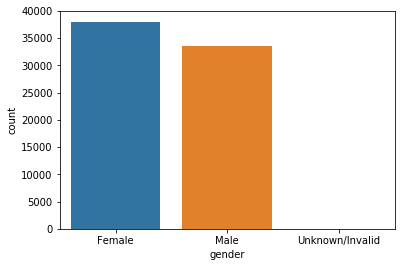

In [44]:
print(collections.Counter(df['gender']))
sns.countplot(df['gender'])

In [45]:
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace=True, axis=0)

df['gender'] = encoder.fit_transform(df['gender'])

#### Age

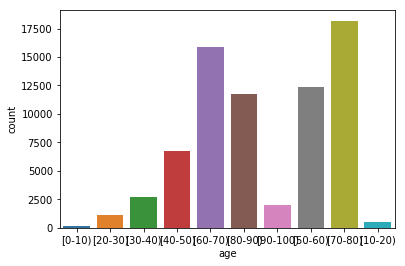

In [46]:
sns.countplot(df['age'])

In [47]:
df['age'] = encoder.fit_transform(df['age'])

#### Number of lab procedure

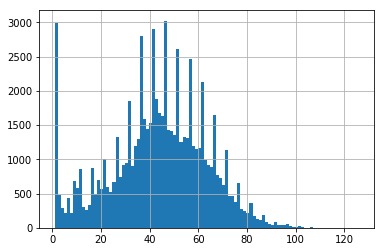

In [48]:
df['num_lab_procedures'].hist(grid=True,bins=100)

In [49]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['num_lab_procedures'].quantile(q = 0.25)
q2 = df['num_lab_procedures'].quantile(q = 0.50)
q3 = df['num_lab_procedures'].quantile(q = 0.75)
q4 = df['num_lab_procedures'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")

# Number of outliers

o_l = df[df['num_lab_procedures'] > h_outliers]['num_lab_procedures'].count()
print("\n# of outliers:", o_l)

Q1: 31.0 ; Q2: 44.0 ; Q3: 57.0 ; Q4: 126.0

The outliers are outside the range [ -8.0 , 96.0 ].

# of outliers: 123


In [50]:
# df.drop(df[df['num_lab_procedures'] > h_outliers].index, inplace=True, axis=0)

#### Number of medication

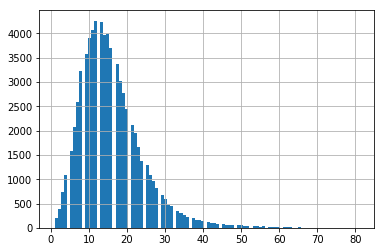

In [51]:
df['num_medications'].hist(grid=True,bins=100)

In [52]:
# Quartiles, Interquartile range (Q3 – Q1) and outliers

q1 = df['num_medications'].quantile(q = 0.25)
q2 = df['num_medications'].quantile(q = 0.50)
q3 = df['num_medications'].quantile(q = 0.75)
q4 = df['num_medications'].quantile(q = 1.00)
iqr = q3 - q1
l_outliers = q1 - 1.5 * iqr # the left-side boundary
h_outliers = q3 + 1.5 * iqr # the right-side boundary
print('Q1:', q1, '; Q2:', q2, '; Q3:', q3, '; Q4:', q4)
print("\nThe outliers are outside the range [", l_outliers , "," , h_outliers, "].")

# Number of outliers

o_l = df[df['num_medications'] > h_outliers]['num_medications'].count()
print("\n# of outliers:", o_l)

Q1: 10.0 ; Q2: 14.0 ; Q3: 20.0 ; Q4: 81.0

The outliers are outside the range [ -5.0 , 35.0 ].

# of outliers: 1949


In [53]:
# df.drop(df[df['num_medications'] > h_outliers].index, inplace=True, axis=0)

#### Discharge Disposition

In [54]:
ap=df.groupby(by=['discharge_disposition_id'])
ap.size()

discharge_disposition_id
1     43529
2      1526
3      9170
4       548
5       839
6      8269
7       406
8        68
9        14
10        6
11     1640
12        2
13      360
14      352
15       41
16        5
17       10
18     2431
19        8
20        2
22     1319
23      277
24       27
25      579
27        4
28       83
dtype: int64

In [55]:
to_drop = [11, 18, 19, 20, 21, 25, 26]

11	Expired

18	NULL

19	Expired at home. Medicaid only, hospice.

20	Expired in a medical facility. Medicaid only, hospice.

21	Expired, place unknown. Medicaid only, hospice.

25	Not Mapped

26	Unknown/Invalid

In [56]:
for i in to_drop:
    df.drop(df[df['discharge_disposition_id'] == i].index, inplace=True, axis=0)

#### A1c test result

In [57]:
ap=df.groupby(by=['A1Cresult'])
ap.size()

A1Cresult
>7       2611
>8       5610
None    55092
Norm     3542
dtype: int64

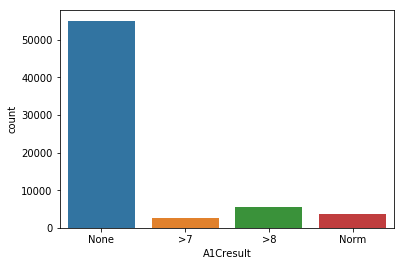

In [58]:
sns.countplot(df['A1Cresult'])

#### Encoding the remaining features

In [59]:
df[['readmitted']] = df[['readmitted']].replace('>30', '<30')

In [60]:
df.reset_index(drop=True, inplace=True)

In [61]:
# this will encode the values in alphabetical order. 
# It should be noted that the target variable "readmitted" will become <30:0, >30:1 and NO:2
for i in df.columns[18:]:
    df[i] = encoder.fit_transform(df[i])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66855 entries, 0 to 66854
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              66855 non-null  int64
 1   patient_nbr               66855 non-null  int64
 2   race                      66855 non-null  int32
 3   gender                    66855 non-null  int32
 4   age                       66855 non-null  int32
 5   admission_type_id         66855 non-null  int64
 6   discharge_disposition_id  66855 non-null  int64
 7   admission_source_id       66855 non-null  int64
 8   time_in_hospital          66855 non-null  int64
 9   medical_specialty         66855 non-null  int32
 10  num_lab_procedures        66855 non-null  int64
 11  num_procedures            66855 non-null  int64
 12  num_medications           66855 non-null  int64
 13  number_outpatient         66855 non-null  int64
 14  number_emergency          66855 non-nu

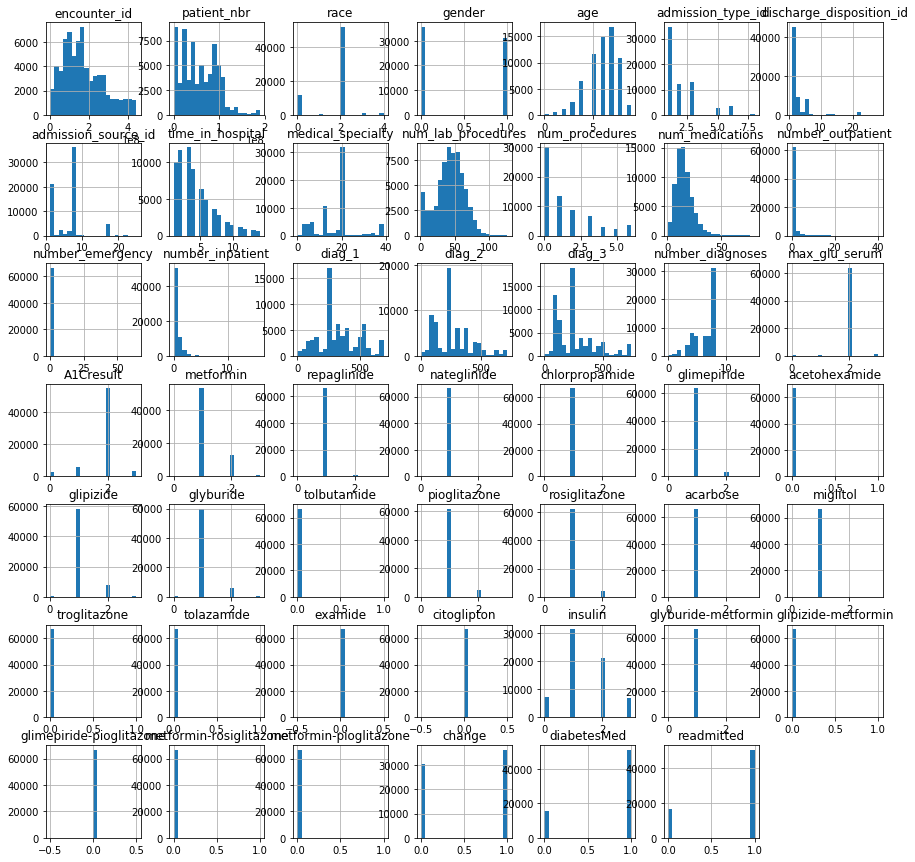

In [63]:
## Visualizing the data
df.hist(bins = 20,figsize = (15,15))
plt.show()

#### Dropping irrelevant columns

In [64]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

## Task 1

### Imports

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix

### Algorithms

In [66]:
def append_avgs(dict):
    avgs = []
    stds = []
    for i in dict:
        avg = np.average(dict[i])
        std = np.std(dict[i])
        avgs.append(avg)
        stds.append(std)
    df = pd.DataFrame(dict)
    df.loc[10] = avgs
    df.loc[11] = stds
    return df

def get_avg(df):
    return df.iloc[[10]].reset_index(drop=True)

def draw(dict):
    folds = list(range(0,10))
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(folds,dict['test_accuracy'][:10],label='accuracy',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_precision'][:10],label = 'precision',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_f1'][:10],label = 'f1 score',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_recall'][:10],label='Recall',marker='o', linestyle='--',)
    plt.xlabel('Fold')
    plt.ylabel('Performance')
    plt.xticks(folds, folds)
    plt.legend()
    plt.show()

In [67]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']
scoring = ['precision', 'recall', 'f1', 'accuracy']

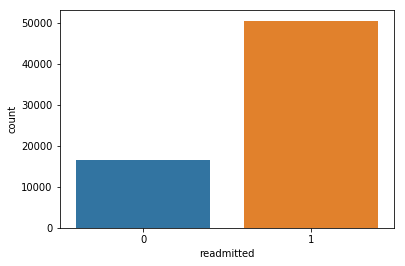

In [68]:
sns.countplot(y)

In [69]:
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333333, random_state=42)


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### DT

In [69]:
clf = make_pipeline(DecisionTreeClassifier(max_depth=6))
dtc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
dtc_sc = append_avgs(dtc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


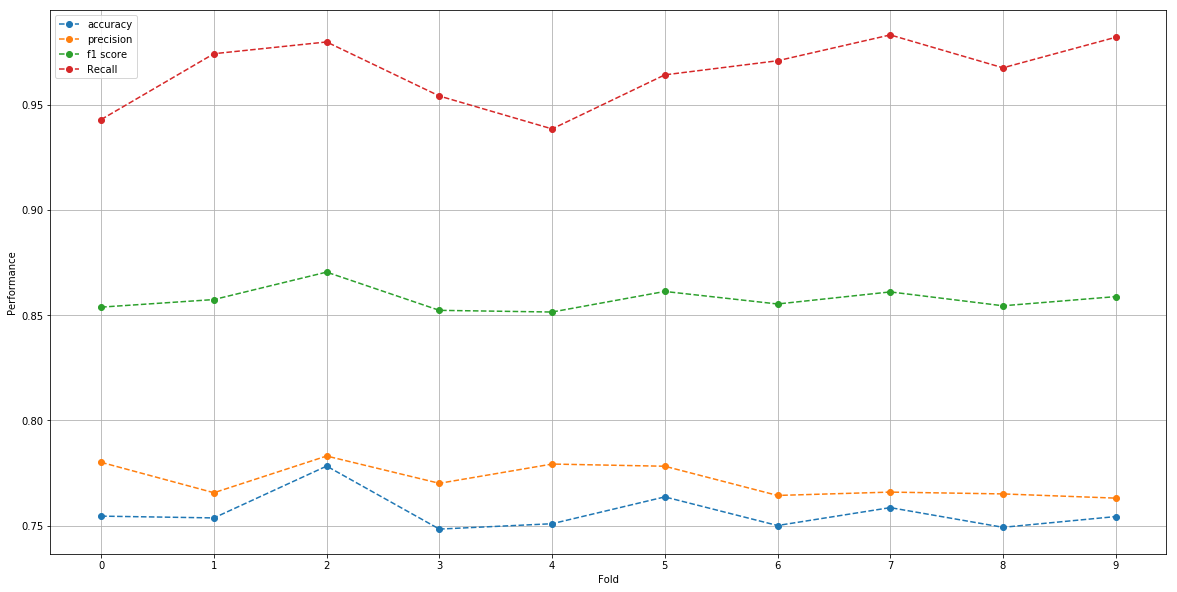

In [70]:
draw(dtc_sc)

In [71]:
dtc_sc

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.069955,0.007996,0.780037,0.943017,0.853819,0.754460
1,0.059964,0.008997,0.765584,0.974302,0.857424,0.753611
2,0.049972,0.007994,0.783036,0.979888,0.870471,0.778250
3,0.049971,0.007995,0.770063,0.954190,0.852295,0.748299
4,0.050969,0.006996,0.779221,0.938547,0.851495,0.750850
5,0.050972,0.008994,0.778179,0.964246,0.861277,0.763605
6,0.050987,0.006996,0.764292,0.970950,0.855315,0.750000
7,0.051955,0.007994,0.765883,0.983240,0.861057,0.758503
8,0.050972,0.008995,0.765018,0.967598,0.854465,0.749150
9,0.049973,0.009008,0.763021,0.982123,0.858818,0.754252


depth = 1 accuracy: 0.755844738613417 precision: 0.755844738613417 recall: 0.755844738613417 f1_score: 0.4304735618083774
depth = 2 accuracy: 0.759255104330267 precision: 0.759255104330267 recall: 0.759255104330267 f1_score: 0.47225013072355215
depth = 3 accuracy: 0.759255104330267 precision: 0.759255104330267 recall: 0.759255104330267 f1_score: 0.47225013072355215
depth = 4 accuracy: 0.759165357864034 precision: 0.759165357864034 recall: 0.759165357864034 f1_score: 0.4698980999702332
depth = 5 accuracy: 0.7587614987659861 precision: 0.7587614987659861 recall: 0.7587614987659861 f1_score: 0.47001415924355405
depth = 6 accuracy: 0.7592999775633834 precision: 0.7592999775633834 recall: 0.7592999775633834 f1_score: 0.4884925223047134
depth = 7 accuracy: 0.7566075835763967 precision: 0.7566075835763967 recall: 0.7566075835763967 f1_score: 0.4986589022857641
depth = 8 accuracy: 0.7564280906439309 precision: 0.7564280906439309 recall: 0.7564280906439309 f1_score: 0.5114211065664485
depth = 9

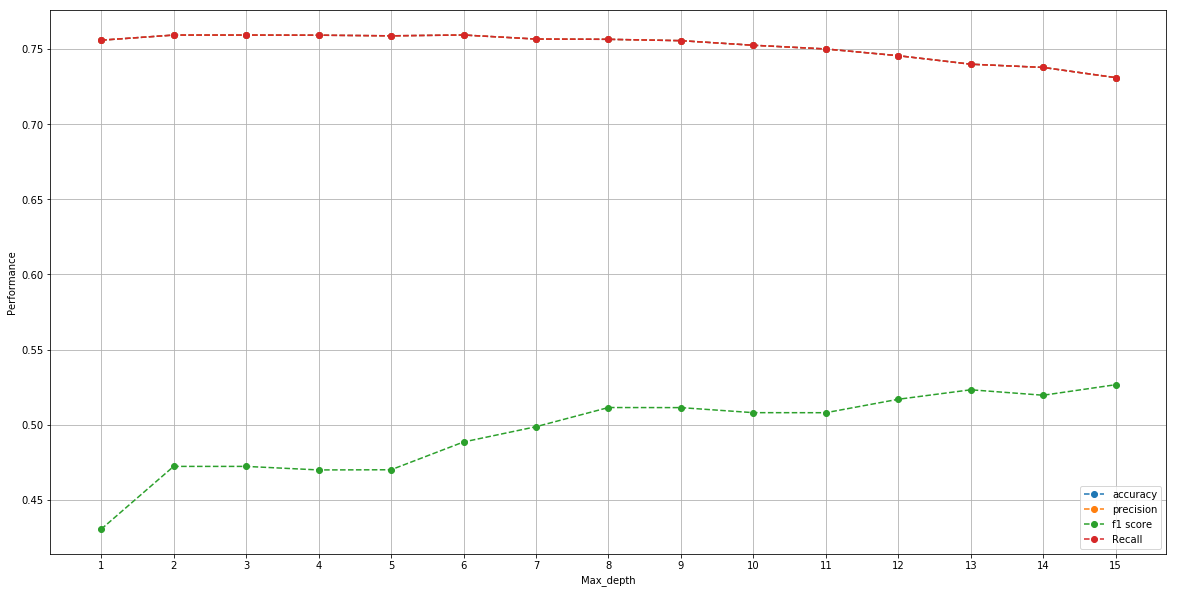

In [62]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
def DT(x_train, x_test, y_train, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in max_depth:
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(x_train, y_train)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list

accuracy_RF, precision_RF, f1_score_RF, recall_RF = DT(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_RF,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth,precision_RF,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth, f1_score_RF,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth, recall_RF,label='Recall',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


In [63]:
print('best estimator:',accuracy_RF.index(max(accuracy_RF))+1)
print('best estimator:',precision_RF.index(max(precision_RF))+1)
print(max(accuracy_RF))
print(max(precision_RF))
print(max(f1_score_RF))
print(max(recall_RF))

best estimator: 6
best estimator: 6
0.7592999775633834
0.7592999775633834
0.5266075591011176
0.7592999775633834


In [72]:
dtc_ovo = DecisionTreeClassifier(max_depth=6)

dtc_ovo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [73]:
dtc_ovo_pred = dtc_ovo.predict(X_test)
dtc_ovo_score = dtc_ovo.score(X_test, y_test)
dtc_ovo_pred_prob = dtc_ovo.predict_proba(X_test)

print("The DTC: Score on test Data: {:.4f}".format(dtc_ovo_score))
print(classification_report(y_test, dtc_ovo_pred, zero_division=0)) 
print(confusion_matrix(y_test, dtc_ovo_pred)) 

The DTC: Score on test Data: 0.7626
              precision    recall  f1-score   support

           0       0.47      0.08      0.13       921
           1       0.77      0.97      0.86      3000

    accuracy                           0.76      3921
   macro avg       0.62      0.52      0.50      3921
weighted avg       0.70      0.76      0.69      3921

[[  70  851]
 [  80 2920]]


In [ ]:
dot_data1 = tree.export_graphviz(dtc_ovo, out_file=None,
                                feature_names=X.columns,
                                class_names=["0","1","2"],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph1 = graphviz.Source(dot_data1)  
graph1 

#### Logistic Regression

In [74]:
clf = LogisticRegression()


clf.fit(X_train, y_train)

LogisticRegression()

In [75]:
lr_pred = clf.predict(X_test)
lr_score = clf.score(X_test, y_test)

print("The LR: Score on test Data: {:.4f}".format(lr_score))
print(classification_report(y_test, lr_pred, zero_division=0)) 
print(confusion_matrix(y_test, lr_pred)) 

The LR: Score on test Data: 0.7646
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       921
           1       0.77      0.98      0.86      3000

    accuracy                           0.76      3921
   macro avg       0.63      0.52      0.49      3921
weighted avg       0.71      0.76      0.69      3921

[[  58  863]
 [  60 2940]]


#### XGBoost

In [75]:
clf = XGBClassifier()

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
xgb_pred = clf.predict(X_test)
xgb_score = clf.score(X_test, y_test)
#xgb_ovo_pred_prob = dtc_ovo.predict_proba(X_test)

print("The XGB: Score on test Data: {:.4f}".format(xgb_score))
print(classification_report(y_test, xgb_pred, zero_division=0)) 
print(confusion_matrix(y_test, xgb_pred)) 

The XGB: Score on test Data: 0.7524
              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1181
           1       0.46      0.09      0.15      3587
           2       0.77      0.98      0.86     14309

    accuracy                           0.75     19077
   macro avg       0.52      0.37      0.35     19077
weighted avg       0.68      0.75      0.68     19077

[[   30   110  1041]
 [   25   332  3230]
 [   33   284 13992]]


#### Random Forest

In [ ]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

In [ ]:
rfc_pred = clf.predict(X_test)
rfc_score = clf.score(X_test, y_test)

print("The RFC: Score on test Data: {:.4f}".format(rfc_score))
print(classification_report(y_test, rfc_pred, zero_division=0)) 
print(confusion_matrix(y_test, rfc_pred)) 

#### Additional test

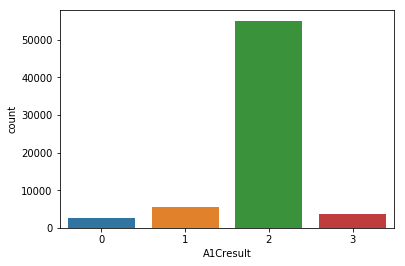

In [65]:
sns.countplot(df['A1Cresult'])

In [67]:
df1 = df.drop(df[df['A1Cresult'] == '2'].index, axis=0)

df1.reset_index(drop=True, inplace=True)

In [71]:
X1 = df1.drop('readmitted', axis=1)
y1 = df1['readmitted']
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [72]:
sc = StandardScaler()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.333333, random_state=42)


X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

##### Random Forest

In [73]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [74]:
rfc_pred1 = clf.predict(X_test1)
rfc_score1 = clf.score(X_test1, y_test1)

print("The RFC: Score on test Data: {:.4f}".format(rfc_score1))
print(classification_report(y_test1, rfc_pred1, zero_division=0)) 
print(confusion_matrix(y_test1, rfc_pred1)) 

The RFC: Score on test Data: 0.7629
              precision    recall  f1-score   support

           0       0.60      0.09      0.15      5441
           1       0.77      0.98      0.86     16844

    accuracy                           0.76     22285
   macro avg       0.68      0.53      0.51     22285
weighted avg       0.73      0.76      0.69     22285

[[  482  4959]
 [  324 16520]]


## Task 2

In [80]:
X_1 = df.drop('admission_type_id', axis=1)
y_1 = df['admission_type_id']
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [81]:
sc = StandardScaler()

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.333333, random_state=42)


X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

#### DT

In [82]:
dtc_ovo_1 = DecisionTreeClassifier(max_depth=6)

dtc_ovo_1.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=6)

In [83]:
dtc_ovo_pred = dtc_ovo_1.predict(X_test_1)
dtc_ovo_score = dtc_ovo_1.score(X_test_1, y_test_1)
dtc_ovo_pred_prob = dtc_ovo_1.predict_proba(X_test_1)

print("The DTC: Score on test Data: {:.4f}".format(dtc_ovo_score))
print(classification_report(y_test_1, dtc_ovo_pred, zero_division=0)) 
print(confusion_matrix(y_test_1, dtc_ovo_pred)) 

The DTC: Score on test Data: 0.7849
              precision    recall  f1-score   support

           1       0.91      0.93      0.92     11556
           2       0.64      0.36      0.46      4135
           3       0.58      0.86      0.70      4299
           4       0.00      0.00      0.00         3
           5       0.72      0.62      0.66       924
           6       0.98      0.81      0.89      1259
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00       104

    accuracy                           0.78     22285
   macro avg       0.48      0.45      0.45     22285
weighted avg       0.79      0.78      0.77     22285

[[10710   369   333     0   136     8     0     0]
 [  743  1482  1864     0    39     7     0     0]
 [  140   440  3712     0     5     2     0     0]
 [    1     2     0     0     0     0     0     0]
 [   24     1   324     0   571     4     0     0]
 [  102    16    81     0    43  1017     0     0]
 [    5

H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression

In [74]:
clf = LogisticRegression()


clf.fit(X_train_1, y_train_1)

LogisticRegression()

In [75]:
lr_pred = clf.predict(X_test_1)
lr_score = clf.score(X_test_1, y_test_1)

print("The LR: Score on test Data: {:.4f}".format(lr_score))
print(classification_report(y_test_1, lr_pred, zero_division=0)) 
print(confusion_matrix(y_test_1, lr_pred)) 

The LR: Score on test Data: 0.7646
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       921
           1       0.77      0.98      0.86      3000

    accuracy                           0.76      3921
   macro avg       0.63      0.52      0.49      3921
weighted avg       0.71      0.76      0.69      3921

[[  58  863]
 [  60 2940]]


#### XGBoost

In [84]:
clf = XGBClassifier()

clf.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
xgb_pred = clf.predict(X_test_1)
xgb_score = clf.score(X_test_1, y_test_1)
#xgb_ovo_pred_prob = dtc_ovo.predict_proba(X_test)

print("The XGB: Score on test Data: {:.4f}".format(xgb_score))
print(classification_report(y_test_1, xgb_pred, zero_division=0)) 
print(confusion_matrix(y_test_1, xgb_pred)) 

The XGB: Score on test Data: 0.8207
              precision    recall  f1-score   support

           1       0.92      0.93      0.92     11556
           2       0.63      0.58      0.61      4135
           3       0.72      0.78      0.75      4299
           4       0.00      0.00      0.00         3
           5       0.72      0.69      0.70       924
           6       0.97      0.89      0.93      1259
           7       0.00      0.00      0.00         5
           8       0.61      0.13      0.22       104

    accuracy                           0.82     22285
   macro avg       0.57      0.50      0.52     22285
weighted avg       0.82      0.82      0.82     22285

[[10741   498   154     0   148    14     0     1]
 [  672  2412   961     0    74    12     0     4]
 [  112   787  3367     0    26     3     0     4]
 [    1     2     0     0     0     0     0     0]
 [   69    74   140     0   640     1     0     0]
 [   85    22    31     0     5  1116     0     0]
 [    5

H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [86]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=42)

In [87]:
rfc_pred = clf.predict(X_test_1)
rfc_score = clf.score(X_test_1, y_test_1)

print("The RFC: Score on test Data: {:.4f}".format(rfc_score))
print(classification_report(y_test_1, rfc_pred, zero_division=0)) 
print(confusion_matrix(y_test_1, rfc_pred)) 

The RFC: Score on test Data: 0.8083
              precision    recall  f1-score   support

           1       0.90      0.94      0.92     11556
           2       0.63      0.51      0.56      4135
           3       0.68      0.79      0.73      4299
           4       0.00      0.00      0.00         3
           5       0.74      0.66      0.70       924
           6       0.97      0.85      0.91      1259
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00       104

    accuracy                           0.81     22285
   macro avg       0.49      0.47      0.48     22285
weighted avg       0.80      0.81      0.80     22285

[[10833   390   186     0   139     8     0     0]
 [  863  2112  1093     0    51    16     0     0]
 [  145   747  3388     0    14     5     0     0]
 [    1     2     0     0     0     0     0     0]
 [   44    84   184     0   611     1     0     0]
 [  108    25    48     0     9  1069     0     0]
 [    5

H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Additional test

In [88]:
X1 = df1.drop('admission_type_id', axis=1)
y1 = df1['admission_type_id']
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [89]:
sc = StandardScaler()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.333333, random_state=42)


X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

##### Random Forest

In [90]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [92]:
rfc_pred1 = clf.predict(X_test1)
rfc_score1 = clf.score(X_test1, y_test1)

print("The RFC: Score on test Data: {:.4f}".format(rfc_score1))
print(classification_report(y_test1, rfc_pred1, zero_division=0)) 
print(confusion_matrix(y_test1, rfc_pred1)) 

The RFC: Score on test Data: 0.8083
              precision    recall  f1-score   support

           1       0.90      0.94      0.92     11556
           2       0.63      0.51      0.56      4135
           3       0.68      0.79      0.73      4299
           4       0.00      0.00      0.00         3
           5       0.74      0.66      0.70       924
           6       0.97      0.85      0.91      1259
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00       104

    accuracy                           0.81     22285
   macro avg       0.49      0.47      0.48     22285
weighted avg       0.80      0.81      0.80     22285

[[10833   390   186     0   139     8     0     0]
 [  863  2112  1093     0    51    16     0     0]
 [  145   747  3388     0    14     5     0     0]
 [    1     2     0     0     0     0     0     0]
 [   44    84   184     0   611     1     0     0]
 [  108    25    48     0     9  1069     0     0]
 [    5

# Part B

### Imports

In [81]:
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

### Algorithms

In [82]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']
scoring = ['precision', 'recall', 'f1', 'accuracy']

In [83]:
# Generate indices for splits
sc = StandardScaler()



train_ind_10 = round(len(df)*0.90)
unlabeled_ind_10 = train_ind_10 + round(len(df)*0.10)

train_ind_20 = round(len(df)*0.80)
unlabeled_ind_20 = train_ind_20 + round(len(df)*0.20)

train_ind_50 = round(len(df)*0.50)
unlabeled_ind_50 = train_ind_50 + round(len(df)*0.50)


train_ind_90 = round(len(df)*0.10)
unlabeled_ind_90 = train_ind_90 + round(len(df)*0.90)


train_ind_95 = round(len(df)*0.05)
unlabeled_ind_95 = train_ind_95 + round(len(df)*0.95)


# Partition the data

train_10 = df.iloc[:train_ind_10]
unlabeled_10 = df.iloc[train_ind_10:unlabeled_ind_10]

train_20 = df.iloc[:train_ind_20]
unlabeled_20 = df.iloc[train_ind_20:unlabeled_ind_20]

train_50 = df.iloc[:train_ind_50]
unlabeled_50 = df.iloc[train_ind_50:unlabeled_ind_50]

train_90 = df.iloc[:train_ind_90]
unlabeled_90 = df.iloc[train_ind_90:unlabeled_ind_90]

train_95 = df.iloc[:train_ind_95]
unlabeled_95 = df.iloc[train_ind_95:unlabeled_ind_95]


# Assign data to train, test, and unlabeled sets

X_10 = train_10.drop('readmitted', axis=1)
y_10 = train_10.readmitted

X_20 = train_20.drop('readmitted', axis=1)
y_20 = train_20.readmitted

X_50 = train_50.drop('readmitted', axis=1)
y_50 = train_50.readmitted

X_90 = train_90.drop('readmitted', axis=1)
y_90 = train_90.readmitted

X_95 = train_95.drop('readmitted', axis=1)
y_95 = train_95.readmitted

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.333333, random_state=42)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.333333, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.333333, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_90, y_90, test_size=0.333333, random_state=42)
X_train_95, X_test_95, y_train_95, y_test_95 = train_test_split(X_95, y_95, test_size=0.333333, random_state=42)

X_train_10 = sc.fit_transform(X_train_10)
X_test_10 = sc.transform(X_test_10)
X_unlabeled_10 = sc.transform(unlabeled_10.drop('readmitted', axis=1))

X_train_20 = sc.fit_transform(X_train_20)
X_test_20 = sc.transform(X_test_20)
X_unlabeled_20 = sc.transform(unlabeled_20.drop('readmitted', axis=1))

X_train_50 = sc.fit_transform(X_train_50)
X_test_50 = sc.transform(X_test_50)
X_unlabeled_50 = sc.transform(unlabeled_50.drop('readmitted', axis=1))

X_train_90 = sc.fit_transform(X_train_90)
X_test_90 = sc.transform(X_test_90)
X_unlabeled_90 = sc.transform(unlabeled_90.drop('readmitted', axis=1))

X_train_95 = sc.fit_transform(X_train_95)
X_test_95 = sc.transform(X_test_95)
X_unlabeled_95 = sc.transform(unlabeled_95.drop('readmitted', axis=1))

In [84]:
# Check dimensions of data after splitting
print(f"X_train_10 dimensions: {X_train_10.shape}")
print(f"y_train_10 dimensions: {y_train_10.shape}\n")

print(f"X_test_10 dimensions: {X_test_10.shape}")
print(f"y_test_10 dimensions: {y_test_10.shape}\n")

print(f"X_unlabeled_10 dimensions: {X_unlabeled_10.shape}\n")

print(f"X_train_20 dimensions: {X_train_20.shape}")
print(f"y_train_20 dimensions: {y_train_20.shape}\n")

print(f"X_test_20 dimensions: {X_test_20.shape}")
print(f"y_test_20 dimensions: {y_test_20.shape}\n")

print(f"X_unlabeled_20 dimensions: {X_unlabeled_20.shape}\n")

print(f"X_train_50 dimensions: {X_train_50.shape}")
print(f"y_train_50 dimensions: {y_train_50.shape}\n")

print(f"X_test_50 dimensions: {X_test_50.shape}")
print(f"y_test_50 dimensions: {y_test_50.shape}\n")

print(f"X_unlabeled_50 dimensions: {X_unlabeled_50.shape}\n")

print(f"X_train_90 dimensions: {X_train_90.shape}")
print(f"y_train_90 dimensions: {y_train_90.shape}\n")

print(f"X_test_90 dimensions: {X_test_90.shape}")
print(f"y_test_90 dimensions: {y_test_90.shape}\n")

print(f"X_unlabeled_90 dimensions: {X_unlabeled_90.shape}\n")

print(f"X_train_95 dimensions: {X_train_95.shape}")
print(f"y_train_95 dimensions: {y_train_95.shape}\n")

print(f"X_test_95 dimensions: {X_test_95.shape}")
print(f"y_test_95 dimensions: {y_test_95.shape}\n")

print(f"X_unlabeled_95 dimensions: {X_unlabeled_95.shape}\n")

X_train_10 dimensions: (40113, 45)
y_train_10 dimensions: (40113,)

X_test_10 dimensions: (20057, 45)
y_test_10 dimensions: (20057,)

X_unlabeled_10 dimensions: (6685, 45)

X_train_20 dimensions: (35656, 45)
y_train_20 dimensions: (35656,)

X_test_20 dimensions: (17828, 45)
y_test_20 dimensions: (17828,)

X_unlabeled_20 dimensions: (13371, 45)

X_train_50 dimensions: (22285, 45)
y_train_50 dimensions: (22285,)

X_test_50 dimensions: (11143, 45)
y_test_50 dimensions: (11143,)

X_unlabeled_50 dimensions: (33427, 45)

X_train_90 dimensions: (4457, 45)
y_train_90 dimensions: (4457,)

X_test_90 dimensions: (2229, 45)
y_test_90 dimensions: (2229,)

X_unlabeled_90 dimensions: (60169, 45)

X_train_95 dimensions: (2228, 45)
y_train_95 dimensions: (2228,)

X_test_95 dimensions: (1115, 45)
y_test_95 dimensions: (1115,)

X_unlabeled_95 dimensions: (63512, 45)



#### Self-training

In [87]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_10, y_train_10)
    y_hat_train = clf.predict(X_train_10)
    y_hat_test = clf.predict(X_test_10)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train_10, y_hat_train)
    test_f1 = f1_score(y_test_10, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled_10)
    preds = clf.predict(X_unlabeled_10)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    #df_pred_prob.index = X_unlabeled_10.index
    
    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train_10 = pd.concat([X_train_10, X_unlabeled_10.loc[high_prob.index]], axis=0)
    y_train_10 = pd.concat([y_train_10, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled_10 = X_unlabeled_10.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.9130488020571149
Test f1: 0.9101718025634034
Now predicting labels for unlabeled data...
3 high-probability predictions added to training data.


AttributeError: 'numpy.ndarray' object has no attribute 'loc'